<h1 style="text-align:center;margin:50px 0">Single Linear Regression</h1>

### Import required modules

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns

### Read dataset

In [18]:
iris = sns.load_dataset('iris')

### Understanding dataset

In [19]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Features and target selection

In [5]:
x = iris['petal_length']
y = iris['petal_width']

Text(0, 0.5, 'petal_width')

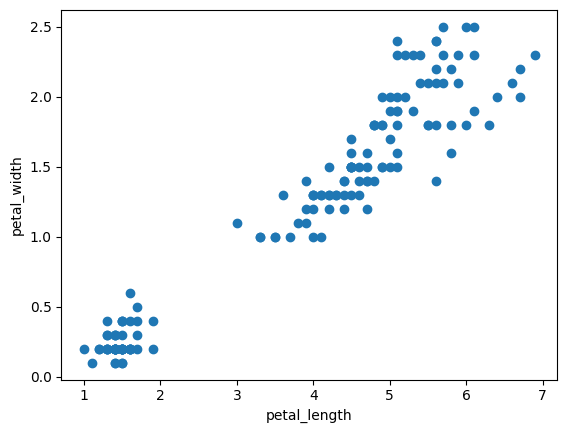

In [6]:
plt.scatter(x, y)
plt.xlabel('petal_length')
plt.ylabel('petal_width')

### Dataset train-test splitting

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=23)

In [8]:
x_train = np.array(x_train).reshape(-1, 1)
x_test = np.array(x_test).reshape(-1, 1)

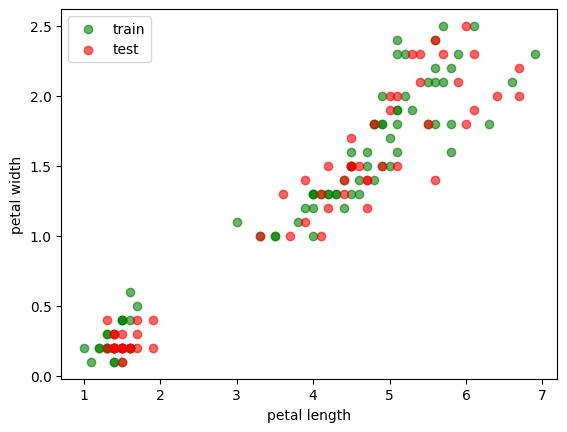

In [9]:
plt.scatter(x_train, y_train, label='train', color='green', alpha=0.6)
plt.scatter(x_test, y_test, label='test', color='red', alpha=0.6)
plt.xlabel("petal length")
plt.ylabel("petal width")
plt.legend()
plt.show()

### Regression

In [10]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [11]:
y_pred_test = model.predict(x_test)
y_pred_train = model.predict(x_train)

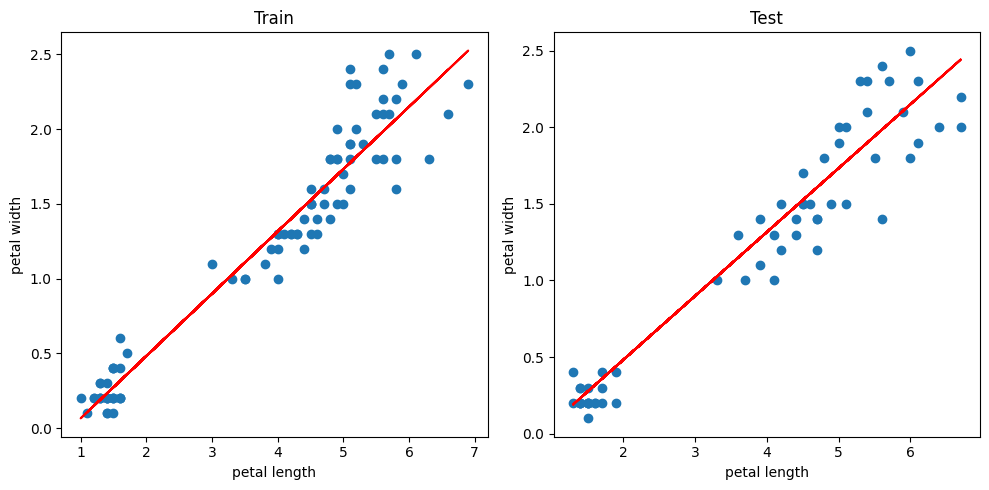

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.scatter(x_train, y_train)
ax1.plot(x_train, y_pred_train, color='red')
ax1.set_title("Train")
ax1.set_xlabel("petal length")
ax1.set_ylabel("petal width")

ax2.scatter(x_test, y_test)
ax2.plot(x_test, y_pred_test, color='red')
ax2.set_title("Test")
ax2.set_xlabel("petal length")
ax2.set_ylabel("petal width")

plt.tight_layout()

plt.show()

In [34]:
print('Coefficient:', model.coef_)
print('Intercept:', model.intercept_)

Coefficient: [0.41684538]
Intercept: -0.35113274221437507


### Evaluation

In [35]:
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)
mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print('CV score:', cross_val_score(model, x_train, y_train, cv=5).mean())
print("R-squared:", r2)
print("Score:", model.score(x_test, y_test))

Mean Absolute Error: 0.17261071169476633
Mean Squared Error: 0.04715090722659735
CV score: 0.9162690195697578
R-squared: 0.9207765993420344
Score: 0.9207765993420344


### Prediction

What is the __petal width__ of a flower with a __petal length of 2__?

In [24]:
print("Petal Width:", round(model.predict([[2]])[0], 2))

Petal Width: 0.48
